<a href="https://colab.research.google.com/github/Deeksha-coder-debug/ML-Projects/blob/main/Linear_Regression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

# **2. Load the dataset and separate input and Target variables**

In [2]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'

data=pd.read_csv(url)

# dropping the null values rows
data=data.dropna()

# slicing the data from 0 to 500 and creates array and then reshapes it i.e. from 1D(1,500) to 2D(500,1)
train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

# Distribution of train and test data

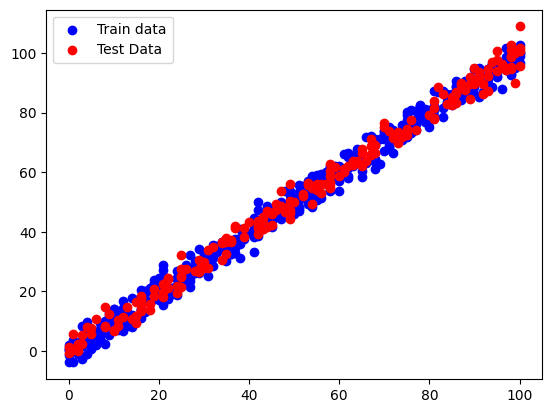

In [20]:
plt.scatter(x=train_input,y=train_output,color='blue',label='Train data')
plt.scatter(x=test_input,y=test_output,color='red',label='Test Data')
plt.legend()
plt.show()



# **3. Build the Linear Regression Model and Plot the regression line**
In forward propagation Linear regression function
Y = mx + c
is applied by initially assigning random value of parameter (m and c). The we have written the function to finding the cost function i.e the mean

In [27]:
class MeraLR:
  def __init__(self):
    self.parameters={}

  def forward_propagation(self,train_input):
    # 1. initializing params values
    m=self.parameters['m']
    c=self.parameters['c']

    # 2.calculating pred value by y=mx+c
    pred_output=np.multiply(m,train_input)+c
    return pred_output

  def cost_function(self,train_output,pred_output):
    # we use mse for evaluating the model's performance
    # formula is 1/n[summation of (predicted_output-test_output)**2]
    cost=np.mean((pred_output-train_output)**2)
    return cost

  def backward_propagation(self,train_input, train_output, pred_output):
    derivatives={}
    df=pred_output-train_output

    # here we dm i.e. differentiating cost func wrt m(slope)
    # which would d(1/n[summation of (predicted_output-test_output)**2]) / dm
    # then in place of pred_output we put mx + c
    # 1/n[summation of (mx + c - y)**2]
    # 1/n[summation 2*(mx + c - y) * (x) ]

    dm=2*np.mean(np.multiply(train_input,df))

    # dc i.e. differentiating cost func wrt c(bias)
    # for c it would be 1/n[summation 2*(mx + c - y) * (1) ]
    dc=2*np.mean(df)

    derivatives['dm']=dm
    derivatives['dc']=dc

    return derivatives

  def update_parameters(self,derivatives,learning_rate):

    # m(new) = m(old) - learning_rate * dm
    # c(new) = c(old) - learning_rate * dc
    self.parameters['m']=self.parameters['m']-learning_rate*derivatives['dm']
    self.parameters['c']=self.parameters['c']-learning_rate*derivatives['dc']

  def fit(self, train_input, train_output, learning_rate, iters):
    # initializing random negative values to m & c
    self.parameters['m'] = np.random.uniform(0, 1) * -1
    self.parameters['c'] = np.random.uniform(0, 1) * -1

    # to keep track of loss in each iteration
    # Helps visualize convergence later.
    self.loss = []

    fig, ax = plt.subplots()

    # np.linspace()	Generate 100 evenly spaced X values for a smooth line
    # ax.plot()	Draw initial regression line (starts random)
    # ax.scatter()	Plot training data points
    # ax.set_ylim()	Fix Y-axis limits for stable visualization

    x_vals = np.linspace(min(train_input), max(train_input), 100)
    line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
    ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')
    ax.set_ylim(0, max(train_output) + 1)

    def predict(frame):
      predictions = self.forward_propagation(train_input)

      cost = self.cost_function(predictions, train_output)

      derivatives = self.backward_propagation(train_input, train_output, predictions)
      self.update_parameters(derivatives, learning_rate)
      line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
      self.loss.append(cost)
      print("Iteration = {}, Loss = {}".format(frame + 1, cost))
      return line,

    ani = FuncAnimation(fig, predict, frames=iters, interval=200, blit=True)
    ani.save('linear_regression_A.gif', writer='ffmpeg')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

    pred_output=self.forward_propagation(train_input)
    return self.parameters, self.loss,pred_output



The linear regression line provides valuable insights into the relationship between the two variables. It represents the best-fitting line that captures the overall trend of how a dependent variable (Y) changes in response to variations in an independent variable (X).

**Positive Linear Regression Line**: A positive linear regression line indicates a direct relationship between the independent variable (
X
X) and the dependent variable (
Y
Y). This means that as the value of X increases, the value of Y also increases. The slope of a positive linear regression line is positive, meaning that the line slants upward from left to right.

**Negative Linear Regression Line**: A negative linear regression line indicates an inverse relationship between the independent variable (
X
X) and the dependent variable (
Y
Y). This means that as the value of X increases, the value of Y decreases. The slope of a negative linear regression line is negative, meaning that the line slants downward from left to right.

# **4. Trained the model and Final Prediction**

Iteration = 1, Loss = 10323.790405278389
Iteration = 1, Loss = 1251.008058954223
Iteration = 1, Loss = 157.63905010591105
Iteration = 1, Loss = 25.87618569883974
Iteration = 2, Loss = 9.997326533650945
Iteration = 3, Loss = 8.0837511268247
Iteration = 4, Loss = 7.8531443923812665
Iteration = 5, Loss = 7.825353698150156
Iteration = 6, Loss = 7.822004543950847
Iteration = 7, Loss = 7.821600861321803
Iteration = 8, Loss = 7.82155214007892
Iteration = 9, Loss = 7.821546195553357
Iteration = 10, Loss = 7.82154540609512
Iteration = 11, Loss = 7.821545237885961
Iteration = 12, Loss = 7.821545144551435
Iteration = 13, Loss = 7.821545060247479
Iteration = 14, Loss = 7.821544977039166
Iteration = 15, Loss = 7.821544893970248
Iteration = 16, Loss = 7.821544810925489
Iteration = 17, Loss = 7.821544727890997
Iteration = 18, Loss = 7.8215446448651
Iteration = 19, Loss = 7.821544561847595
Iteration = 20, Loss = 7.821544478838458


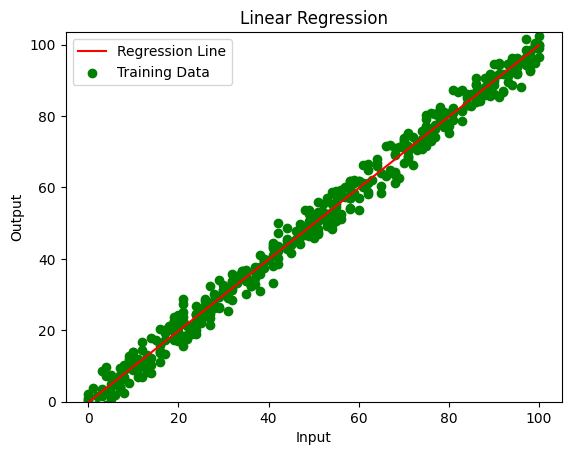

In [28]:
linear_reg = MeraLR()
parameters, loss,pred_output = linear_reg.fit(train_input, train_output, 0.0001, 20)

# **Building the Regression metrics**

Make Methods @staticmethod

If you don’t need self, convert the methods into static methods so they can be called directly using the class name.

In [33]:
class RegressionMetrics:
  def mean_squared_error(self,pred_output,train_output):
    mse=linear_reg.cost_function(train_output,pred_output)
    return mse
  def root_mean_squared_error(self,pred_output,train_output):
    mse=linear_reg.cost_function(train_output,pred_output)
    rmse=np.sqrt(mse)
    return rmse
  def r2_score(self,pred_output,train_output):
    mean_y = np.mean(train_output)
    ss_total = np.sum((train_output - mean_y) ** 2)
    ss_residual = np.sum((train_output - pred_output) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2


In [34]:
metrics=RegressionMetrics()
print(f"Mean Squared Error (MSE): {metrics.mean_squared_error(pred_output,train_output)}")
print(f"Root Mean Squared Error (RMSE): {metrics.root_mean_squared_error(pred_output,train_output)}")
print(f"R-squared (Coefficient of Determination): {metrics.r2_score(pred_output,train_output)}")

Mean Squared Error (MSE): 7.821544395837686
Root Mean Squared Error (RMSE): 2.796702414601469
R-squared (Coefficient of Determination): 0.9905949750615786
